# House Price Prediction - Data Preprocessing

This notebook focuses on cleaning and preparing the house prices dataset for machine learning. We'll handle missing values, fix data types, remove outliers, and prepare the data for feature engineering.

## Objectives
- Handle missing values using domain-specific strategies
- Fix data type issues
- Remove or cap outliers
- Prepare clean datasets for feature engineering
- Save processed data for next steps

Let's get started!

## 1. Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import our custom modules
import sys
import os
sys.path.append(os.path.join('..', 'src'))
from utils import *
from data_preprocessing import DataPreprocessor

# Load the data
train_path = '../data/train.csv'
test_path = '../data/test.csv'

print("Loading data...")
train_df, test_df = load_data(train_path, test_path)

if train_df is not None and test_df is not None:
    print("✅ Data loaded successfully!")
    print(f"Training data shape: {train_df.shape}")
    print(f"Test data shape: {test_df.shape}")
    
    # Display basic info
    print_data_summary(train_df, "Original Training Data")
else:
    print("❌ Failed to load data. Please ensure the CSV files are in the ../data/ directory")

Loading data...
Training data shape: (1460, 81)
Test data shape: (1459, 80)
✅ Data loaded successfully!
Training data shape: (1460, 81)
Test data shape: (1459, 80)

Original Training Data
Shape: (1460, 81)
Memory usage: 3.43 MB

Feature types:
  Numeric features: 38
  Categorical features: 43
  Total features: 81

Missing data:
  Features with missing values: 19
  Total missing values: 7829
  Percentage of total data: 6.62%


## 2. Handle Missing Values

Based on our EDA, we identified several features with missing values. We'll use domain knowledge to handle these appropriately.

🔍 MISSING VALUES ANALYSIS - BEFORE PREPROCESSING
Features with missing values: 19
Top features with missing values:


,Missing Count,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


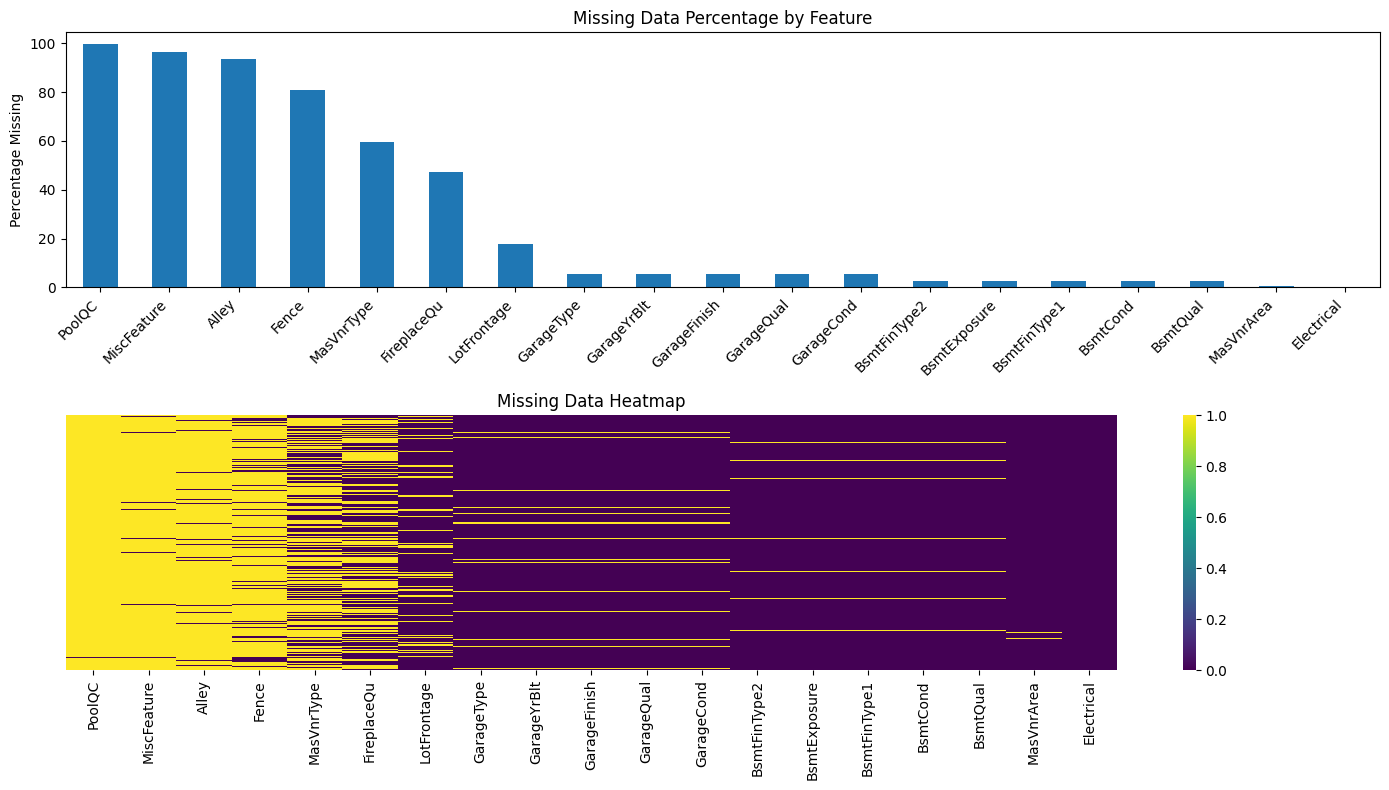


🛠️ APPLYING MISSING VALUE STRATEGIES...
--------------------------------------------------
✓ Missing values handled. Remaining missing values: 0

✅ MISSING VALUES ANALYSIS - AFTER PREPROCESSING
🎉 All missing values handled successfully!

Data shape before: (1460, 81)
Data shape after: (1460, 81)


In [2]:
# Initialize the preprocessor
preprocessor = DataPreprocessor()

if train_df is not None:
    # Show missing values before preprocessing
    print("🔍 MISSING VALUES ANALYSIS - BEFORE PREPROCESSING")
    print("="*60)
    
    missing_before = get_missing_data_info(train_df)
    if not missing_before.empty:
        print(f"Features with missing values: {len(missing_before)}")
        print("Top features with missing values:")
        display(missing_before.head(10))
        
        # Visualize missing data
        plot_missing_data(train_df, figsize=(14, 8))
    else:
        print("No missing values found!")
    
    # Handle missing values using our custom strategy
    print("\n🛠️ APPLYING MISSING VALUE STRATEGIES...")
    print("-" * 50)
    
    # Apply missing value handling
    train_processed = preprocessor.handle_missing_values(train_df.copy())
    
    # Check results
    missing_after = get_missing_data_info(train_processed)
    print(f"\n✅ MISSING VALUES ANALYSIS - AFTER PREPROCESSING")
    print("="*60)
    
    if not missing_after.empty:
        print(f"Remaining features with missing values: {len(missing_after)}")
        display(missing_after)
    else:
        print("🎉 All missing values handled successfully!")
    
    print(f"\nData shape before: {train_df.shape}")
    print(f"Data shape after: {train_processed.shape}")
    
else:
    print("❌ Please load the data first!")

## 3. Fix Data Types

Some features might have incorrect data types. Let's fix them based on domain knowledge.

In [3]:
# Fix data types
if 'train_processed' in locals():
    print("🔧 FIXING DATA TYPES")
    print("="*30)
    
    # Show current data types
    print("Current data types summary:")
    current_types = get_data_types_info(train_processed)
    print(f"Numerical features: {len(current_types['numeric'])}")
    print(f"Categorical features: {len(current_types['categorical'])}")
    
    # Apply data type fixes
    train_processed = preprocessor.fix_data_types(train_processed)
    
    # Show updated data types
    print("\nAfter fixing data types:")
    updated_types = get_data_types_info(train_processed)
    print(f"Numerical features: {len(updated_types['numeric'])}")
    print(f"Categorical features: {len(updated_types['categorical'])}")
    
    # Show specific examples of data type changes
    print("\n📋 Data type examples:")
    print(train_processed.dtypes.head(10))
    
else:
    print("❌ Please complete the missing values step first!")

🔧 FIXING DATA TYPES
Current data types summary:
Numerical features: 38
Categorical features: 43
✓ Data types corrected based on domain knowledge.

After fixing data types:
Numerical features: 37
Categorical features: 43

📋 Data type examples:
Id                int64
MSSubClass     category
MSZoning         object
LotFrontage     float64
LotArea           int32
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
dtype: object


## 4. Handle Outliers

Outliers can significantly impact model performance. Let's identify and handle them appropriately.

🎯 OUTLIER DETECTION AND HANDLING
Analyzing outliers in 6 key features...
GrLivArea: 31 outliers (2.1%)
LotArea: 69 outliers (4.7%)
TotalBsmtSF: 61 outliers (4.2%)
GarageArea: 21 outliers (1.4%)
1stFlrSF: 20 outliers (1.4%)
2ndFlrSF: 2 outliers (0.1%)


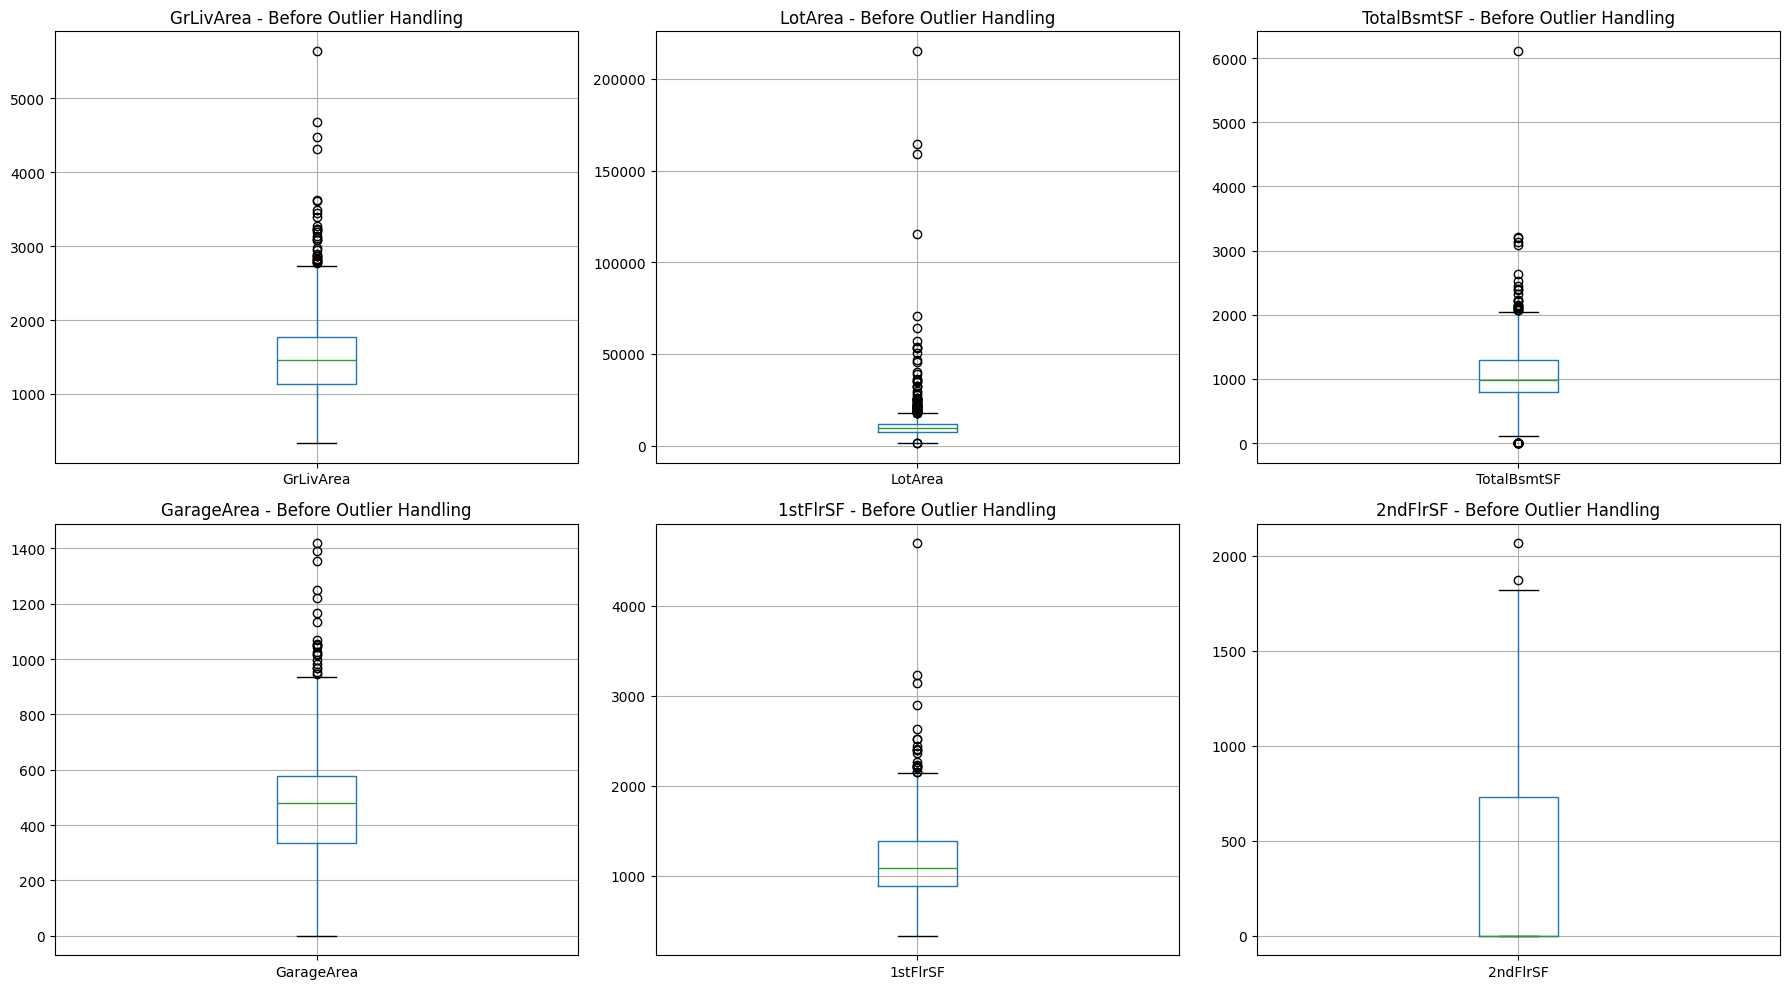


🛠️ APPLYING OUTLIER HANDLING...
✓ Outliers handled using iqr method. 1221 outliers capped.

Outliers after handling (capped, not removed):
GrLivArea: 0 outliers (was 31)
LotArea: 0 outliers (was 69)
TotalBsmtSF: 0 outliers (was 61)
GarageArea: 0 outliers (was 21)
1stFlrSF: 0 outliers (was 20)
2ndFlrSF: 0 outliers (was 2)

Data shape maintained: (1460, 81)


In [4]:
# Handle outliers
if 'train_processed' in locals():
    print("🎯 OUTLIER DETECTION AND HANDLING")
    print("="*40)
    
    # Analyze outliers in key numerical features before handling
    numerical_cols = train_processed.select_dtypes(include=[np.number]).columns.tolist()
    key_features = ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', '2ndFlrSF']
    available_key_features = [f for f in key_features if f in numerical_cols]
    
    print(f"Analyzing outliers in {len(available_key_features)} key features...")
    
    # Show outlier counts before handling
    outlier_counts_before = {}
    for feature in available_key_features:
        outliers = detect_outliers_iqr(train_processed[feature])
        outlier_counts_before[feature] = outliers.sum()
        print(f"{feature}: {outliers.sum()} outliers ({outliers.sum()/len(train_processed)*100:.1f}%)")
    
    # Visualize outliers in key features
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(available_key_features[:6]):
        if i < len(axes):
            train_processed.boxplot(column=feature, ax=axes[i])
            axes[i].set_title(f'{feature} - Before Outlier Handling')
    
    # Hide unused subplots
    for i in range(len(available_key_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Apply outlier handling
    print(f"\n🛠️ APPLYING OUTLIER HANDLING...")
    train_processed = preprocessor.handle_outliers(train_processed, target_col='SalePrice', method='iqr', factor=1.5)
    
    # Show outlier counts after handling
    print(f"\nOutliers after handling (capped, not removed):")
    for feature in available_key_features:
        outliers = detect_outliers_iqr(train_processed[feature])
        outlier_counts_after = outliers.sum()
        print(f"{feature}: {outlier_counts_after} outliers (was {outlier_counts_before[feature]})")
    
    print(f"\nData shape maintained: {train_processed.shape}")
    
else:
    print("❌ Please complete the previous preprocessing steps first!")

## 5. Handle Rare Categories

Categorical features with rare categories can cause issues during model training. Let's group rare categories together.

In [5]:
# Handle rare categories
if 'train_processed' in locals():
    print("📂 HANDLING RARE CATEGORIES")
    print("="*35)
    
    # Analyze categorical features before handling rare categories
    categorical_features = train_processed.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"Analyzing {len(categorical_features)} categorical features...")
    
    # Show category counts for some features
    rare_category_info = []
    for feature in categorical_features[:5]:  # Show first 5 features as examples
        value_counts = train_processed[feature].value_counts()
        rare_count = (value_counts / len(train_processed) < 0.01).sum()
        rare_category_info.append({
            'Feature': feature,
            'Total_Categories': len(value_counts),
            'Rare_Categories': rare_count,
            'Rare_Percentage': rare_count / len(value_counts) * 100
        })
    
    if rare_category_info:
        rare_df = pd.DataFrame(rare_category_info)
        print(f"\nExample features with rare categories (<1% frequency):")
        display(rare_df)
    
    # Apply rare category handling
    print(f"\n🛠️ GROUPING RARE CATEGORIES...")
    train_processed = preprocessor.handle_rare_categories(train_processed, threshold=0.01)
    
    # Show results
    print(f"\nCategorical features after handling rare categories:")
    for feature in categorical_features[:5]:
        value_counts_after = train_processed[feature].value_counts()
        print(f"{feature}: {len(value_counts_after)} categories (had {rare_df[rare_df['Feature']==feature]['Total_Categories'].iloc[0] if not rare_df.empty else 'N/A'})")
    
else:
    print("❌ Please complete the previous preprocessing steps first!")

📂 HANDLING RARE CATEGORIES
Analyzing 44 categorical features...

Example features with rare categories (<1% frequency):


,Feature,Total_Categories,Rare_Categories,Rare_Percentage
0,MSSubClass,15,3,20.0
1,MSZoning,5,1,20.0
2,Street,2,1,50.0
3,Alley,3,0,0.0
4,LotShape,4,1,25.0



🛠️ GROUPING RARE CATEGORIES...
✓ Rare categories handled. 88 categories grouped into 'Other'.

Categorical features after handling rare categories:
MSSubClass: 13 categories (had 15)
MSZoning: 5 categories (had 5)
Street: 2 categories (had 2)
Alley: 3 categories (had 3)
LotShape: 4 categories (had 4)
Street: 2 categories (had 2)
Alley: 3 categories (had 3)
LotShape: 4 categories (had 4)


## 6. Apply Complete Preprocessing Pipeline

Now let's apply the complete preprocessing pipeline to both training and test data.

In [6]:
# Apply complete preprocessing pipeline to fresh data
if train_df is not None and test_df is not None:
    print("🚀 APPLYING COMPLETE PREPROCESSING PIPELINE")
    print("="*50)
    
    # Create a fresh preprocessor for the complete pipeline
    final_preprocessor = DataPreprocessor()
    
    # Apply the complete pipeline
    train_final, test_final = final_preprocessor.preprocess_pipeline(
        train_df.copy(), 
        test_df.copy(), 
        target_col='SalePrice'
    )
    
    # Compare before and after
    print(f"\n📊 PREPROCESSING RESULTS SUMMARY:")
    print(f"{'='*45}")
    print(f"Training data: {train_df.shape} → {train_final.shape}")
    print(f"Test data: {test_df.shape} → {test_final.shape}")
    
    # Check data quality
    train_missing_final = get_missing_data_info(train_final)
    test_missing_final = get_missing_data_info(test_final)
    
    print(f"\nMissing values after preprocessing:")
    print(f"Training data: {len(train_missing_final) if not train_missing_final.empty else 0} features with missing values")
    print(f"Test data: {len(test_missing_final) if not test_missing_final.empty else 0} features with missing values")
    
    # Show preprocessing summary
    preprocessing_summary = final_preprocessor.get_preprocessing_summary()
    print(f"\n✅ PREPROCESSING STEPS COMPLETED:")
    for i, step in enumerate(preprocessing_summary['preprocessing_log'], 1):
        print(f"{i}. {step}")
    
    print(f"\n🎯 Data is now ready for feature engineering!")
    
else:
    print("❌ Please load the original data first!")

🚀 APPLYING COMPLETE PREPROCESSING PIPELINE
Starting preprocessing pipeline...
✓ Data types corrected based on domain knowledge.
✓ Missing values handled. Remaining missing values: 0
✓ Outliers handled using iqr method. 1221 outliers capped.
✓ Rare categories handled. 88 categories grouped into 'Other'.
✓ Data types corrected based on domain knowledge.
✓ Missing values handled. Remaining missing values: 0
✓ Outliers handled using iqr method. 1221 outliers capped.
✓ Rare categories handled. 88 categories grouped into 'Other'.
✓ Data types corrected based on domain knowledge.
✓ Missing values handled. Remaining missing values: 0
✓ Rare categories handled. 70 categories grouped into 'Other'.

PREPROCESSING COMPLETED
Training data: (1460, 81) → (1460, 81)
Test data: (1459, 80) → (1459, 80)

Preprocessing steps completed:
1. Data types corrected based on domain knowledge.
2. Missing values handled. Remaining missing values: 0
3. Outliers handled using iqr method. 1221 outliers capped.
4. Rar

## 7. Save Preprocessed Data

Let's save our cleaned data for the next steps in the pipeline.

In [7]:
# Save preprocessed data
if 'train_final' in locals() and 'test_final' in locals():
    print("💾 SAVING PREPROCESSED DATA")
    print("="*30)
    
    # Define output paths
    train_output_path = '../outputs/cleaned_data/train_preprocessed.csv'
    test_output_path = '../outputs/cleaned_data/test_preprocessed.csv'
    
    # Save the data
    save_processed_data(train_final, train_output_path)
    save_processed_data(test_final, test_output_path)
    
    print(f"\n✅ PREPROCESSING COMPLETED SUCCESSFULLY!")
    print(f"{'='*45}")
    print(f"📁 Files saved:")
    print(f"   • Training data: {train_output_path}")
    print(f"   • Test data: {test_output_path}")
    
    print(f"\n📈 FINAL DATA SUMMARY:")
    print(f"   • Training samples: {train_final.shape[0]:,}")
    print(f"   • Test samples: {test_final.shape[0]:,}")
    print(f"   • Total features: {train_final.shape[1] - 1}")  # -1 for target in training
    print(f"   • Target variable: SalePrice (in training data only)")
    
    # Show final data sample
    print(f"\n🔍 PREPROCESSED DATA SAMPLE:")
    display(train_final.head())
    
    print(f"\n🚀 Ready for feature engineering and model training!")
    
else:
    print("❌ Please complete the preprocessing pipeline first!")

💾 SAVING PREPROCESSED DATA
Data saved successfully to: ../outputs/cleaned_data/train_preprocessed.csv
Shape: (1460, 81)
Data saved successfully to: ../outputs/cleaned_data/test_preprocessed.csv
Shape: (1459, 80)

✅ PREPROCESSING COMPLETED SUCCESSFULLY!
📁 Files saved:
   • Training data: ../outputs/cleaned_data/train_preprocessed.csv
   • Test data: ../outputs/cleaned_data/test_preprocessed.csv

📈 FINAL DATA SUMMARY:
   • Training samples: 1,460
   • Test samples: 1,459
   • Total features: 80
   • Target variable: SalePrice (in training data only)

🔍 PREPROCESSED DATA SAMPLE:
Data saved successfully to: ../outputs/cleaned_data/test_preprocessed.csv
Shape: (1459, 80)

✅ PREPROCESSING COMPLETED SUCCESSFULLY!
📁 Files saved:
   • Training data: ../outputs/cleaned_data/train_preprocessed.csv
   • Test data: ../outputs/cleaned_data/test_preprocessed.csv

📈 FINAL DATA SUMMARY:
   • Training samples: 1,460
   • Test samples: 1,459
   • Total features: 80
   • Target variable: SalePrice (in tra

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000



🚀 Ready for feature engineering and model training!
